## Waste Segregation - Ali Akbar Khan

In [1]:
!pip install -Uqq fastai icrawler --use-deprecated=legacy-resolver

In [5]:
from fastai.vision.all import *


In [6]:
path = Path('dataset')
from time import sleep

resize_images(path, max_size=400, dest=path, recurse=True)
print(f"Photos resized!")

Photos resized!


In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

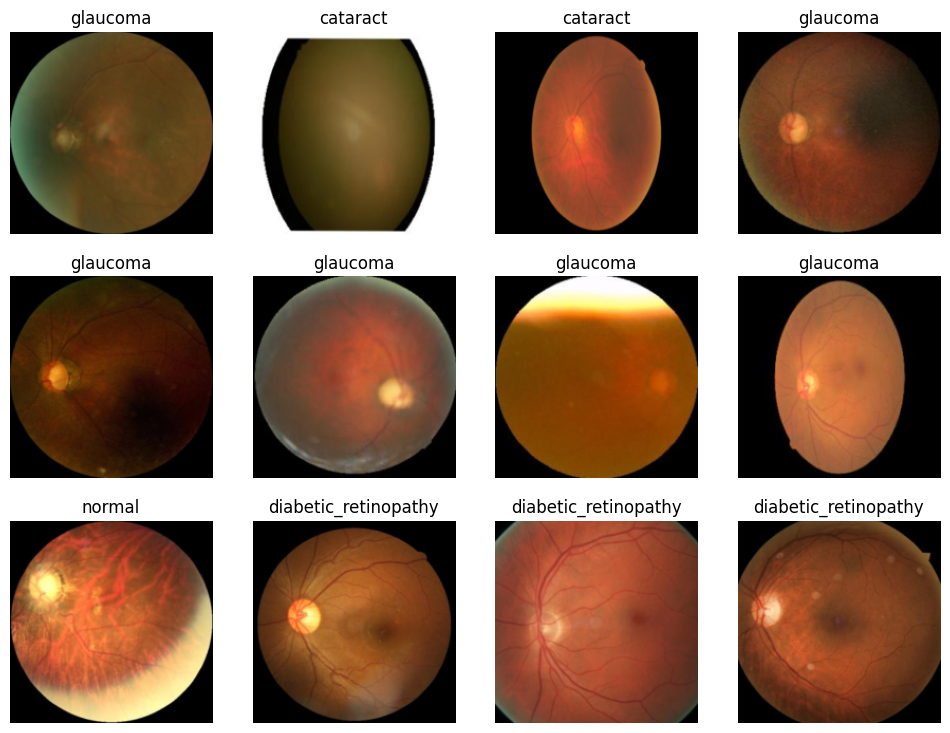

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.934252,0.508964,0.168446,04:45


epoch,train_loss,valid_loss,error_rate,time
0,0.451360,0.372733,0.126928,05:40
1,0.251638,0.383533,0.123369,06:49
2,0.238288,0.448369,0.126928,06:54
3,0.153230,0.351186,0.094899,06:54
4,0.092775,0.345055,0.093713,06:59
5,0.076282,0.402912,0.096085,06:58
6,0.056470,0.347500,0.086595,06:51
7,0.029424,0.354650,0.079478,06:48
8,0.017004,0.338838,0.080664,06:39
9,0.009953,0.337977,0.078292,06:44


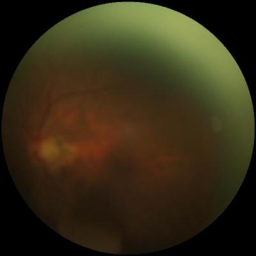

In [10]:
im = Image.open("C:/Users/unique/Documents/3113_left.jpg")
im.to_thumb(256,256)

In [11]:
# Check for category index
classes = list(learn.dls.vocab)

print(classes)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [12]:
predicted_class,_,probs = learn.predict(im)
# is_bird,_,probs = learn.predict(PILImage.create('forest000001.png'))
print(f"This is a: {predicted_class}.")
predicted_idx = classes.index(predicted_class)
# print(f"Probability it's a {predicted_class}: {probs[predicted_idx]:.4f}")
for idx, ele in enumerate(classes):
    print(f"Probability it's a {ele}: {probs[idx]:.4f}")

This is a: normal.
Probability it's a cataract: 0.0001
Probability it's a diabetic_retinopathy: 0.0000
Probability it's a glaucoma: 0.0000
Probability it's a normal: 0.9999


In [13]:
#Export the model

learn.export('eye_disease_model.pkl')